# Life Expectancy Exploratory data analysis

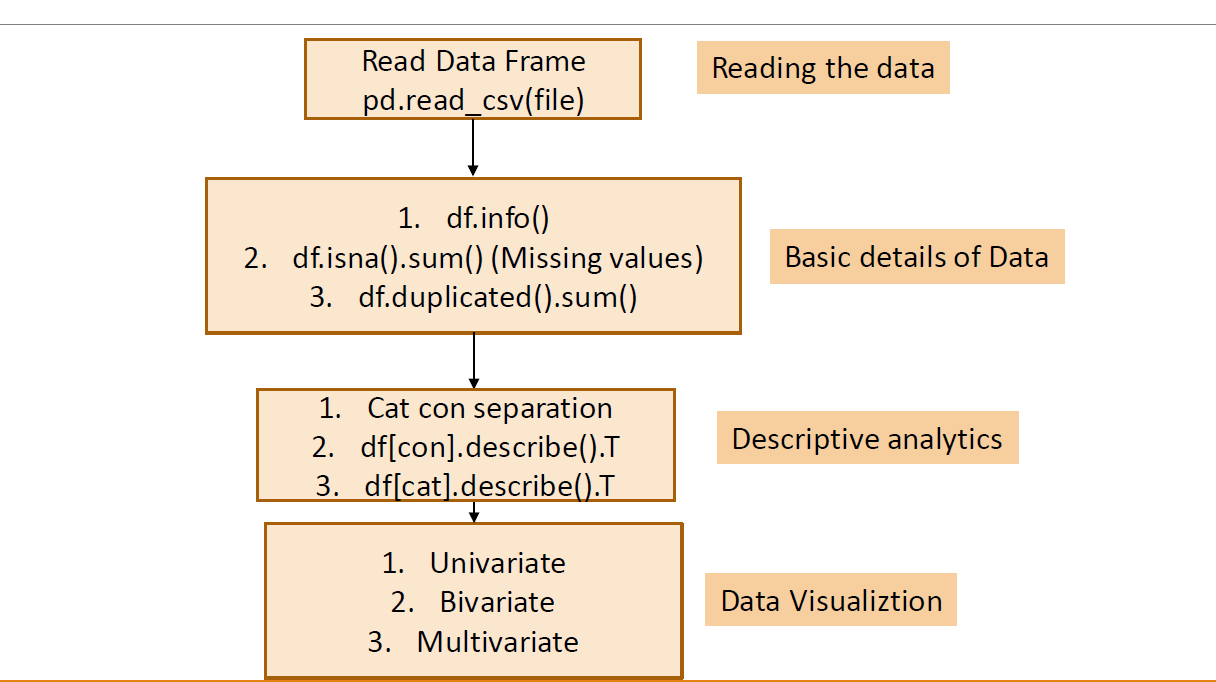

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [2]:
import os
os.chdir('C:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
m = df.isna().sum()
m

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
m[m>0]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.duplicated().sum()

0

### Descriptive Analytics

In [10]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [11]:
cat

['Country', 'Status']

In [12]:
con

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [15]:
df[cat].describe().T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


In [17]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [19]:
pd.set_option('display.float_format',lambda x: "%.3F"%x)

In [20]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.000,2007.519,4.614,2000.000,2004.000,2008.000,2012.000,2015.000
Life expectancy,2928.000,69.225,9.524,36.300,63.100,72.100,75.700,89.000
Adult Mortality,2928.000,164.796,124.292,1.000,74.000,144.000,228.000,723.000
infant deaths,2938.000,30.304,117.927,0.000,0.000,3.000,22.000,1800.000
Alcohol,2744.000,4.603,4.052,0.010,0.877,3.755,7.703,17.870
percentage expenditure,2938.000,738.251,1987.915,0.000,4.685,64.913,441.534,19479.912
Hepatitis B,2385.000,80.940,25.070,1.000,77.000,92.000,97.000,99.000
Measles,2938.000,2419.592,11467.272,0.000,0.000,17.000,360.250,212183.000
BMI,2904.000,38.321,20.044,1.000,19.300,43.500,56.200,87.300
under-five deaths,2938.000,42.036,160.446,0.000,0.000,4.000,28.000,2500.000


## Data Visualization
1.Univarate - Analysis of single Variables at a time
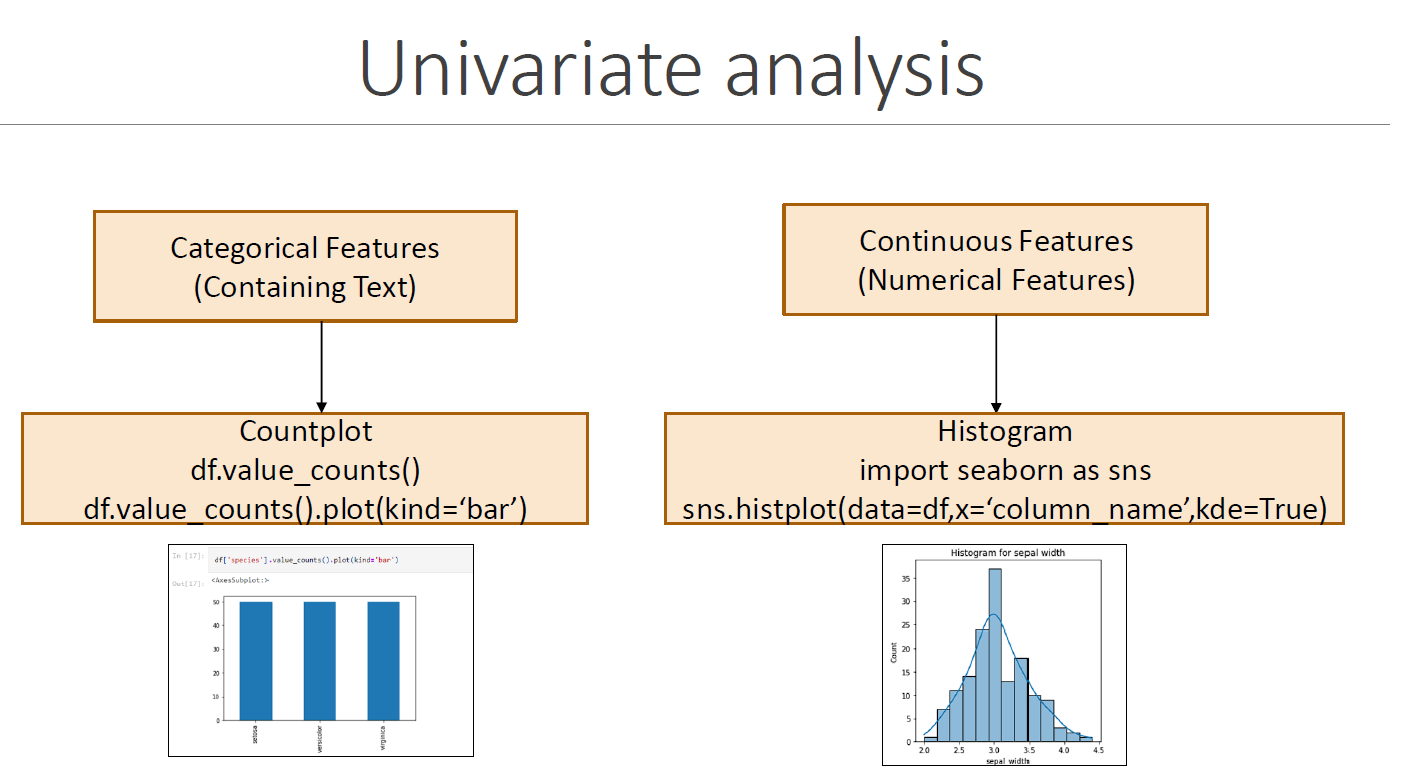

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

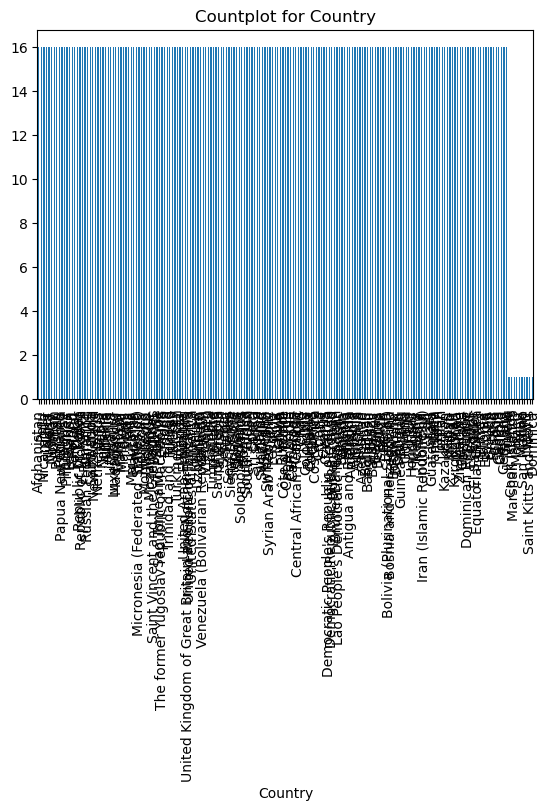

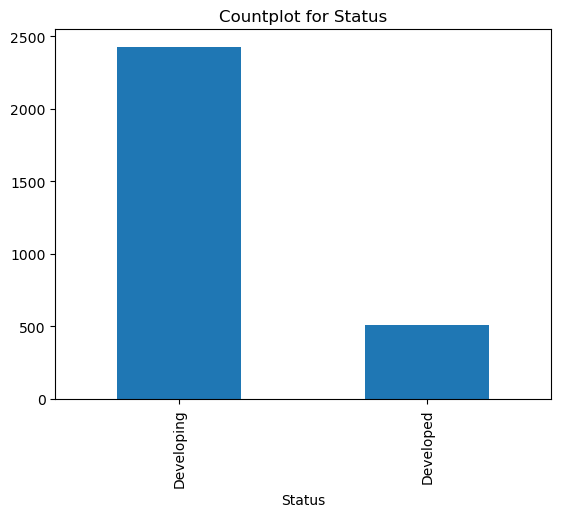

In [23]:
for i in cat:
    df[i].value_counts().plot(kind='bar', title=f'Countplot for {i}')
    plt.show()

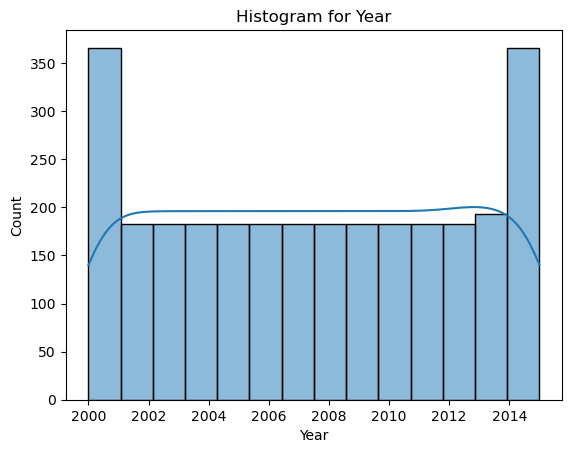

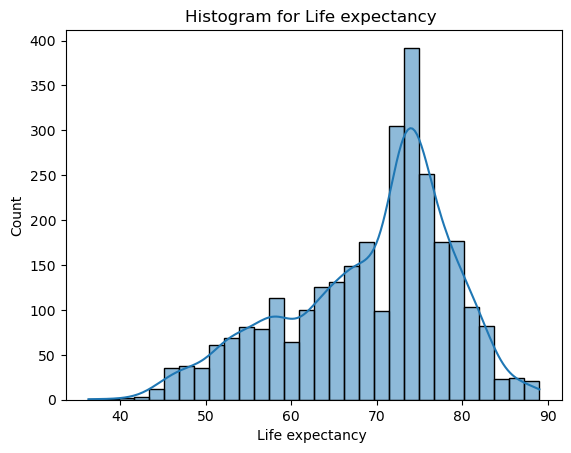

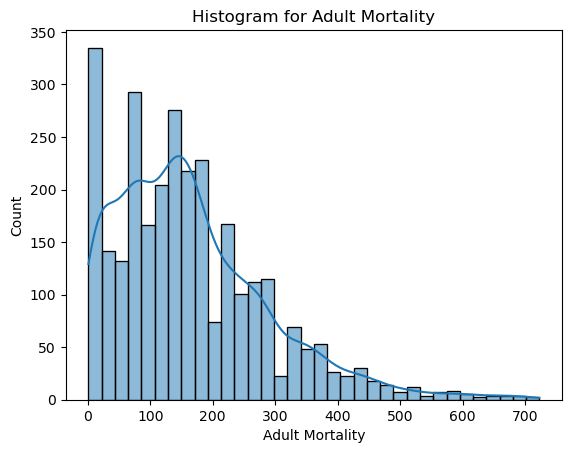

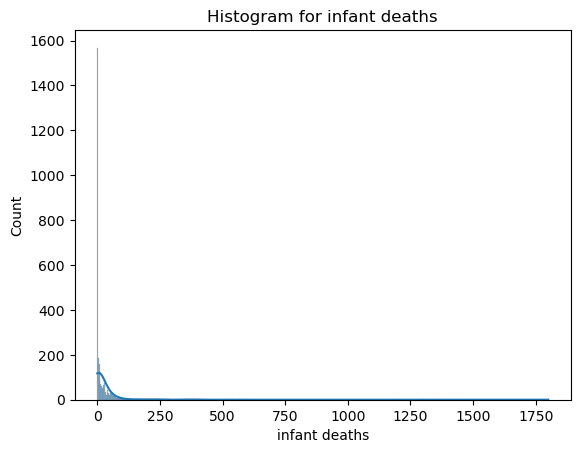

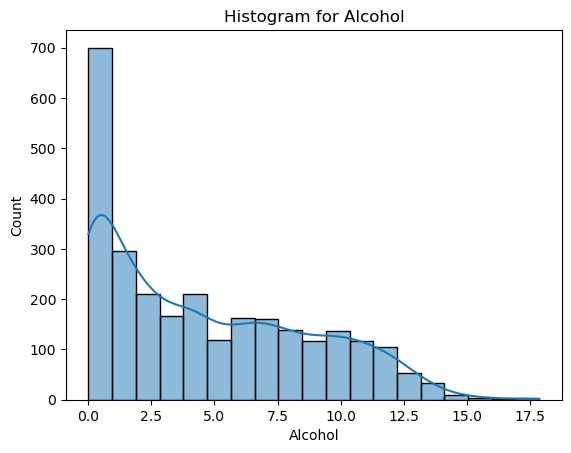

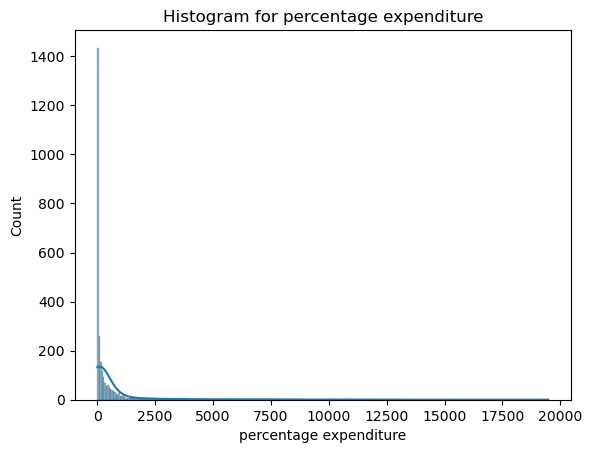

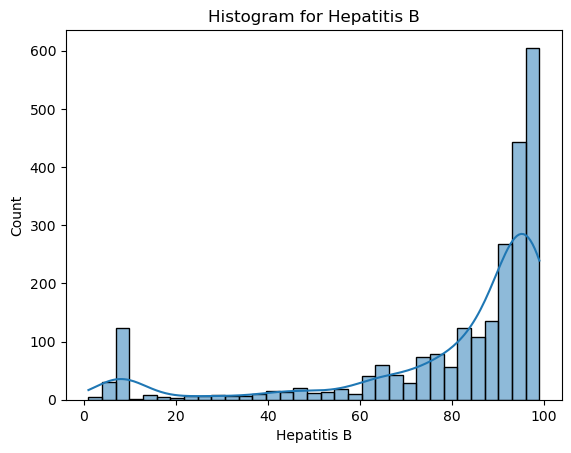

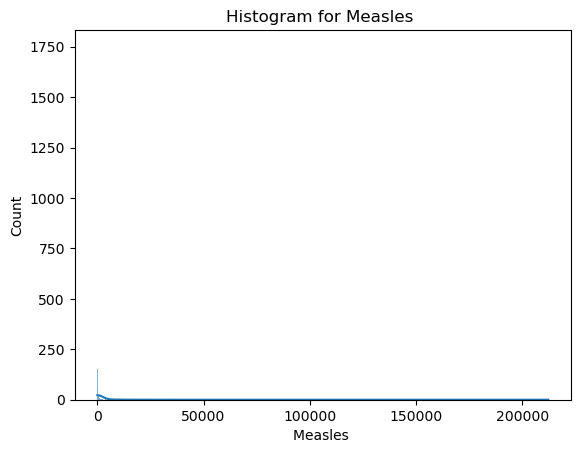

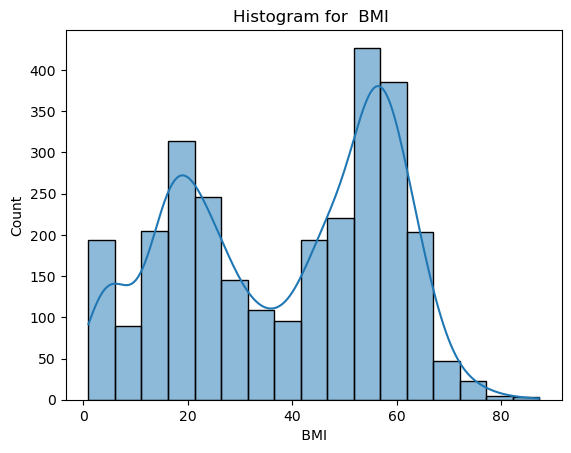

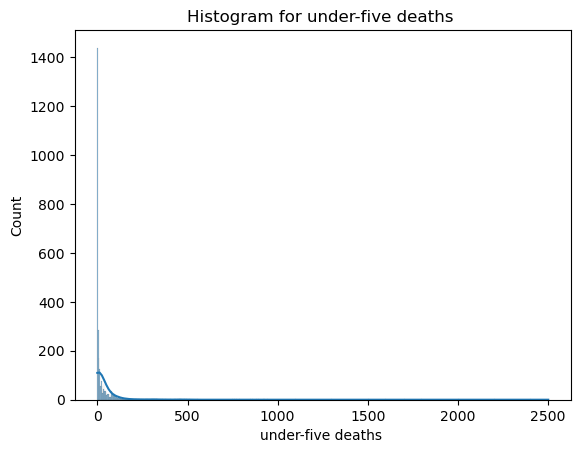

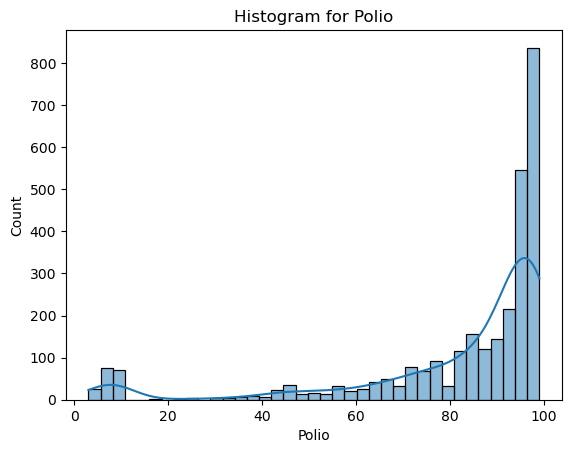

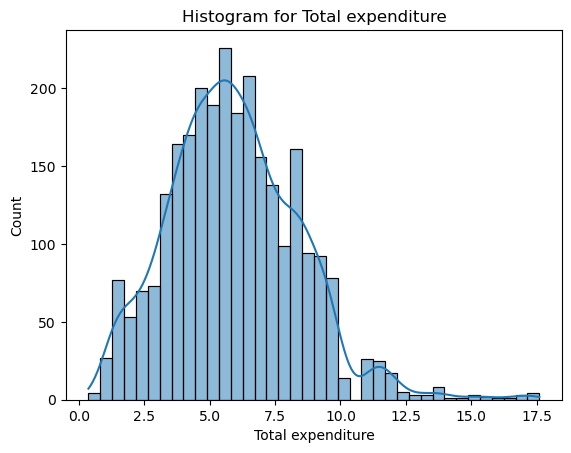

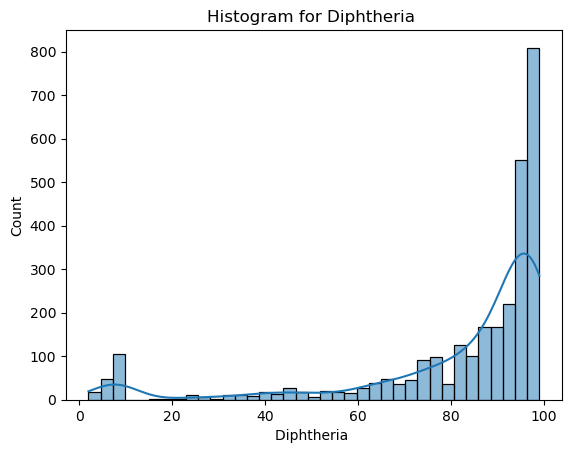

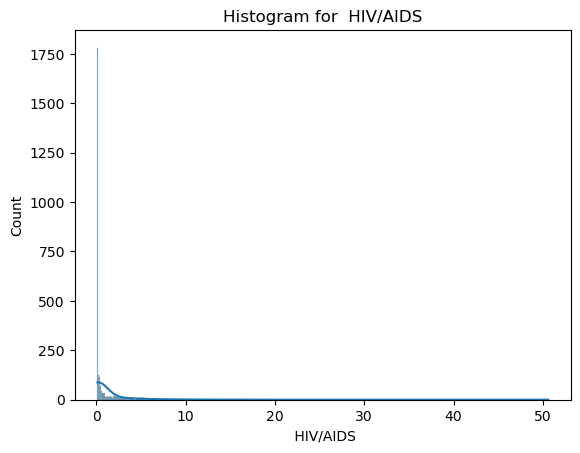

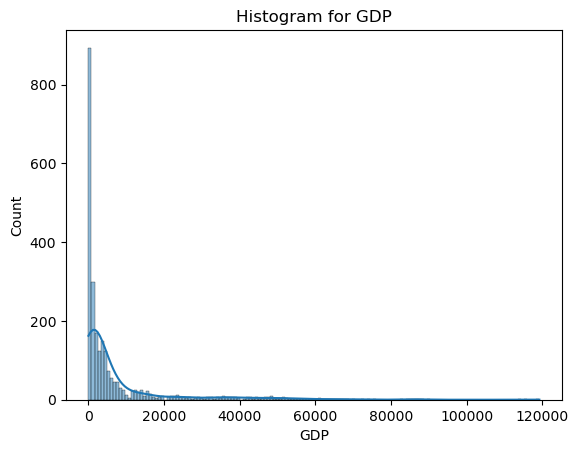

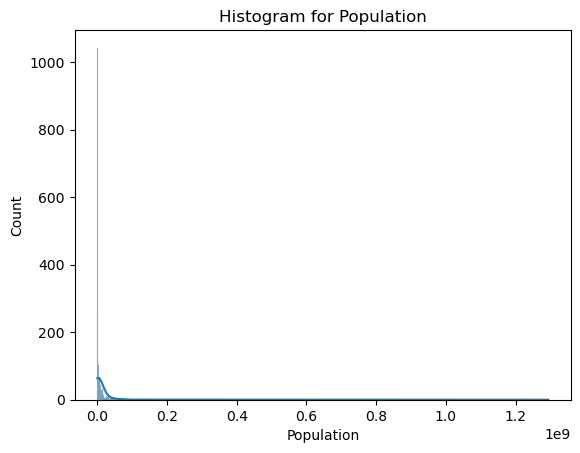

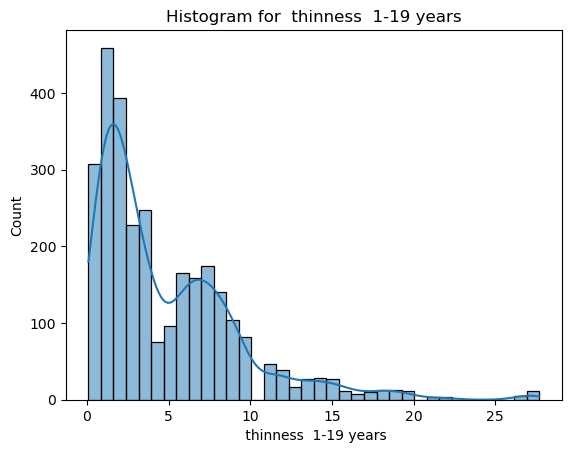

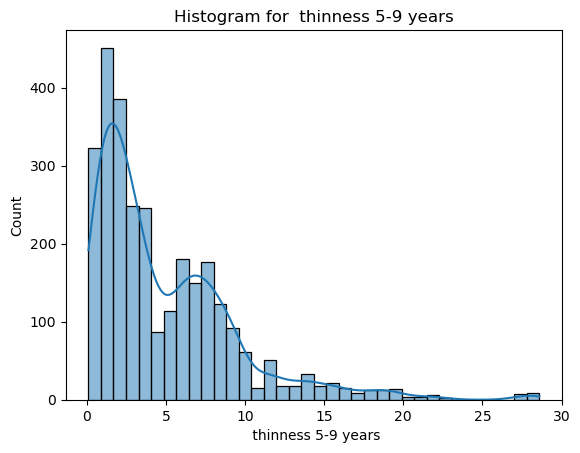

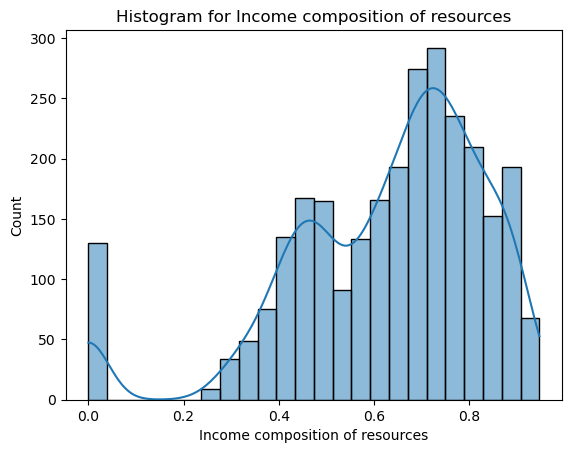

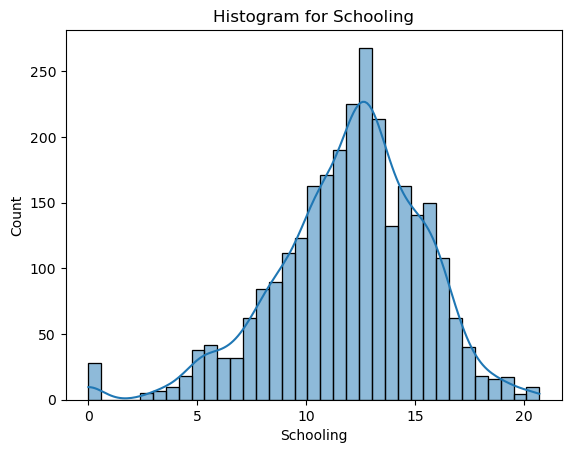

In [26]:
for i in con:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

## Bivariate analysis

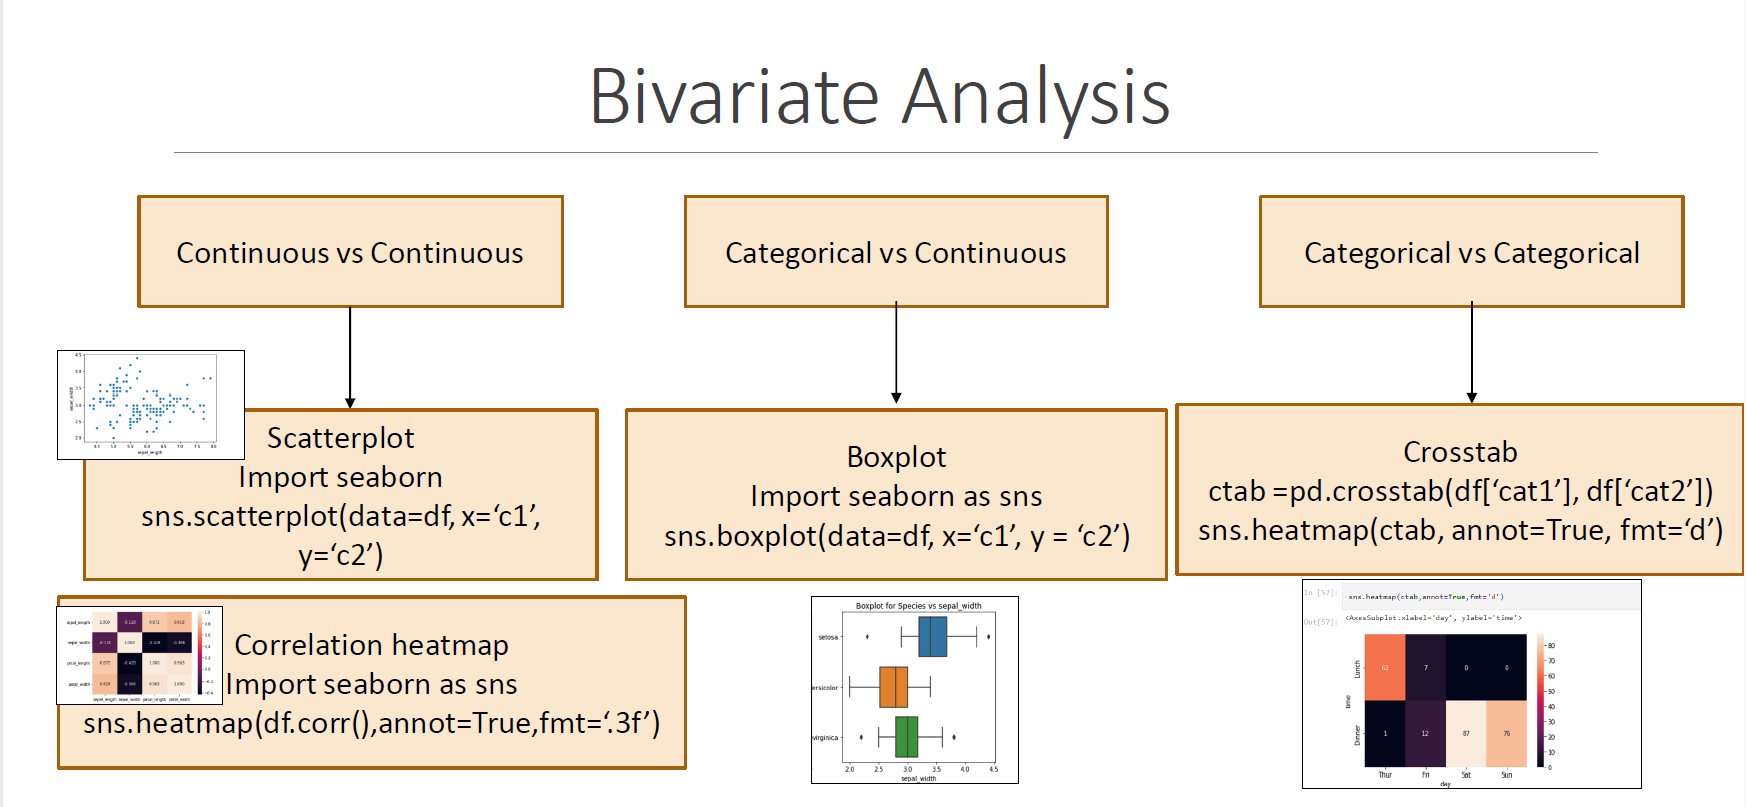

In [27]:
con

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

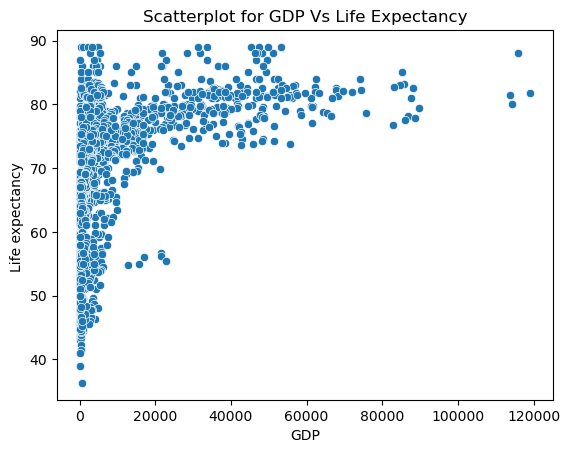

In [29]:
sns.scatterplot(data=df, x='GDP', y='Life expectancy ')
plt.title('Scatterplot for GDP Vs Life Expectancy')
plt.show()

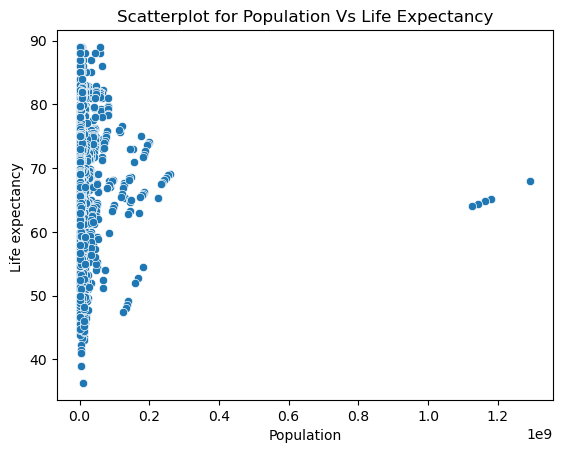

In [31]:
sns.scatterplot(data=df, x='Population', y='Life expectancy ')
plt.title('Scatterplot for Population Vs Life Expectancy')
plt.show()

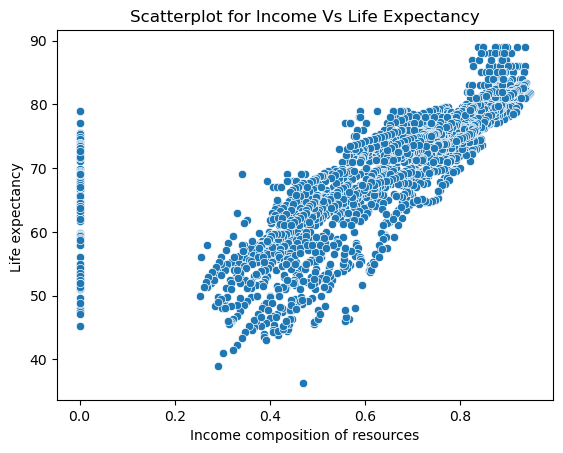

In [33]:
sns.scatterplot(data=df, x='Income composition of resources', y='Life expectancy ')
plt.title('Scatterplot for Income Vs Life Expectancy')
plt.show()

In [36]:
df[con].corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000,0.170,-0.079,-0.037,-0.053,0.031,0.104,-0.082,0.109,-0.043,0.094,0.091,0.134,-0.140,0.102,0.017,-0.048,-0.051,0.243,0.209
Life expectancy,0.170,1.000,-0.696,-0.197,0.405,0.382,0.257,-0.158,0.568,-0.223,0.466,0.218,0.479,-0.557,0.461,-0.022,-0.477,-0.472,0.725,0.752
Adult Mortality,-0.079,-0.696,1.000,0.079,-0.196,-0.243,-0.162,0.031,-0.387,0.094,-0.275,-0.115,-0.275,0.524,-0.296,-0.014,0.303,0.308,-0.458,-0.455
infant deaths,-0.037,-0.197,0.079,1.000,-0.116,-0.086,-0.224,0.501,-0.227,0.997,-0.171,-0.129,-0.175,0.025,-0.108,0.557,0.466,0.471,-0.145,-0.194
Alcohol,-0.053,0.405,-0.196,-0.116,1.000,0.341,0.088,-0.052,0.330,-0.112,0.222,0.297,0.222,-0.049,0.355,-0.035,-0.429,-0.417,0.450,0.547
percentage expenditure,0.031,0.382,-0.243,-0.086,0.341,1.000,0.016,-0.057,0.229,-0.088,0.147,0.174,0.144,-0.098,0.899,-0.026,-0.251,-0.253,0.382,0.390
Hepatitis B,0.104,0.257,-0.162,-0.224,0.088,0.016,1.000,-0.121,0.150,-0.233,0.486,0.058,0.611,-0.113,0.084,-0.123,-0.120,-0.125,0.200,0.231
Measles,-0.082,-0.158,0.031,0.501,-0.052,-0.057,-0.121,1.000,-0.176,0.508,-0.136,-0.106,-0.142,0.031,-0.076,0.266,0.225,0.221,-0.130,-0.137
BMI,0.109,0.568,-0.387,-0.227,0.330,0.229,0.150,-0.176,1.000,-0.238,0.285,0.243,0.283,-0.244,0.302,-0.072,-0.532,-0.539,0.509,0.547
under-five deaths,-0.043,-0.223,0.094,0.997,-0.112,-0.088,-0.233,0.508,-0.238,1.000,-0.189,-0.130,-0.196,0.038,-0.112,0.544,0.468,0.472,-0.163,-0.209


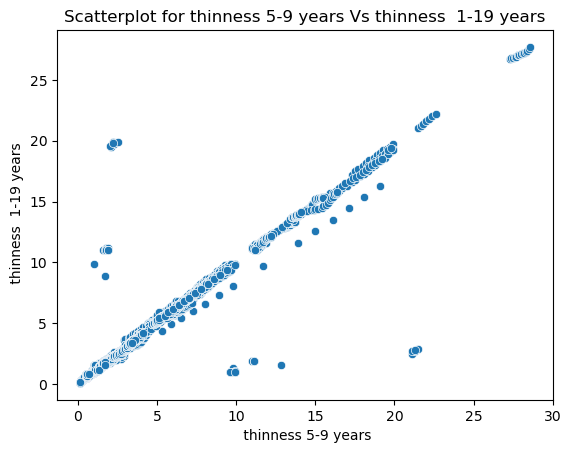

In [38]:
sns.scatterplot(data=df, x=' thinness 5-9 years', y= ' thinness  1-19 years')
plt.title('Scatterplot for thinness 5-9 years Vs thinness  1-19 years')
plt.show()

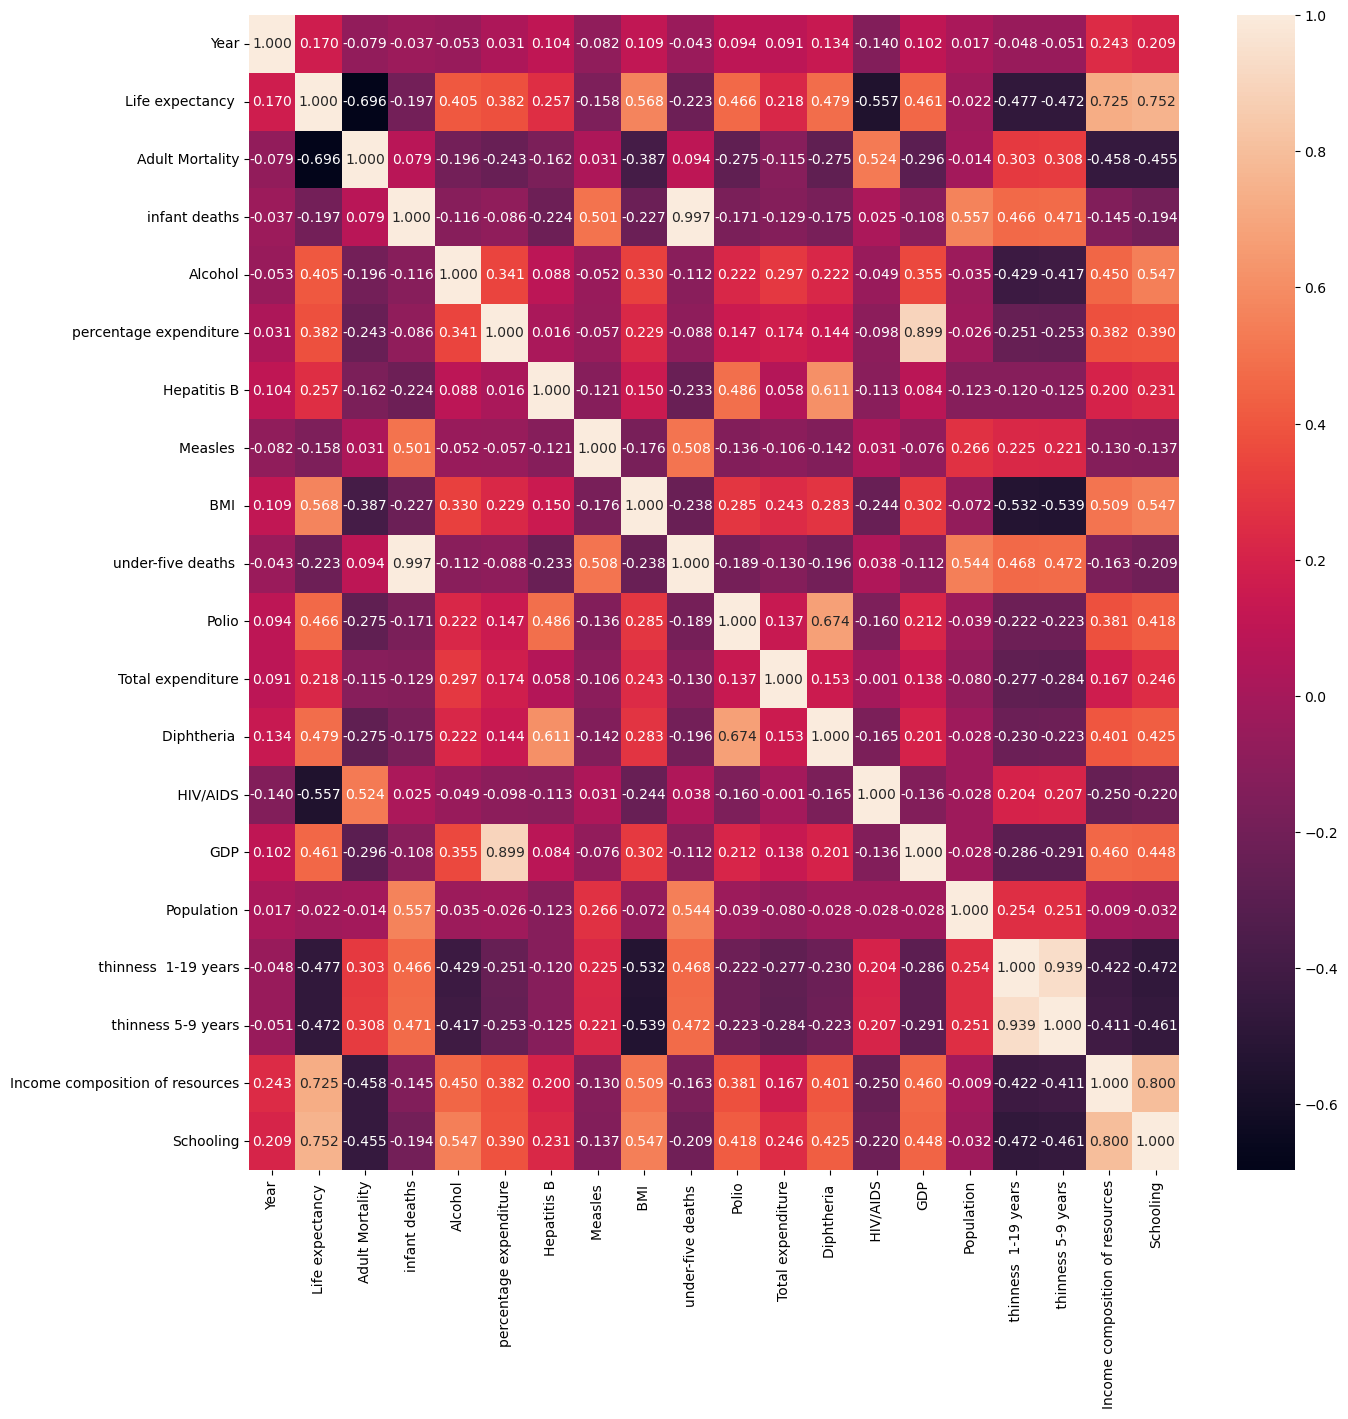

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[con].corr(), annot=True, fmt='.3f')
plt.show()

## Categorical Vs Continous - Boxplot

[]

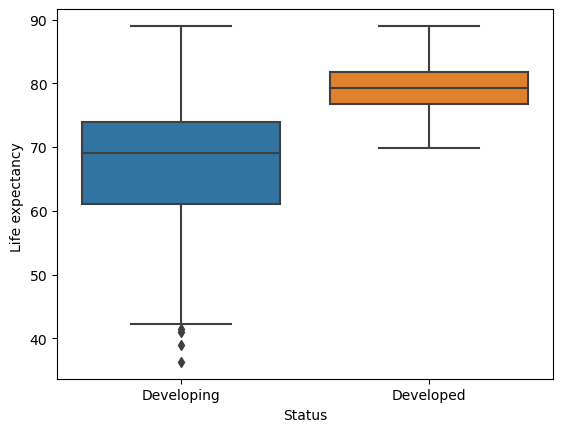

In [42]:
sns.boxplot(data=df, x='Status', y='Life expectancy ')
plt.plot()

[]

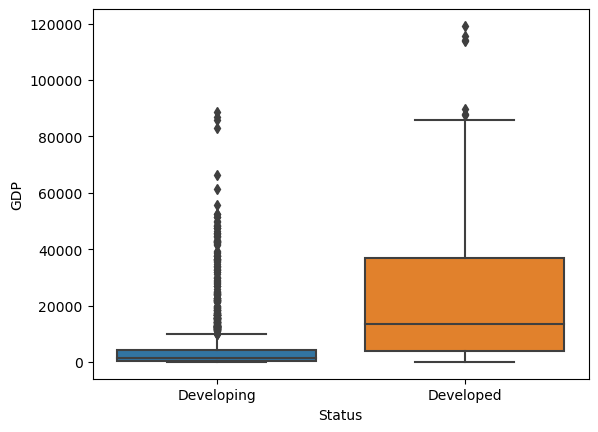

In [43]:
sns.boxplot(data=df, x='Status', y='GDP')
plt.plot()

[]

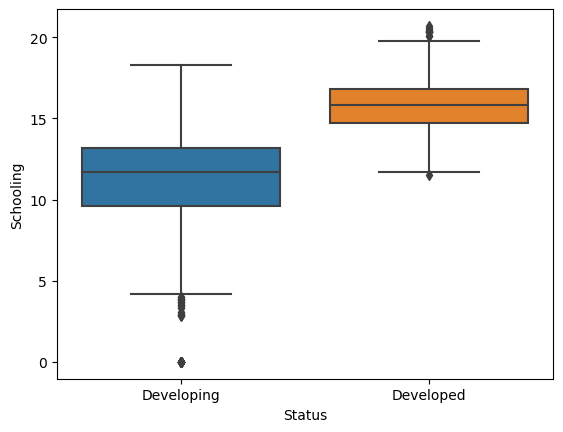

In [44]:
sns.boxplot(data=df, x='Status', y='Schooling')
plt.plot()

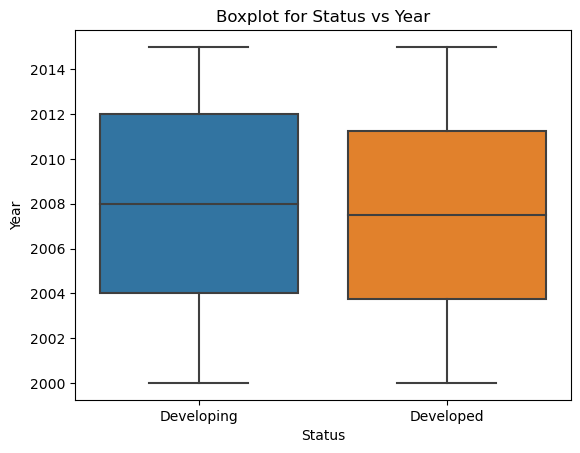

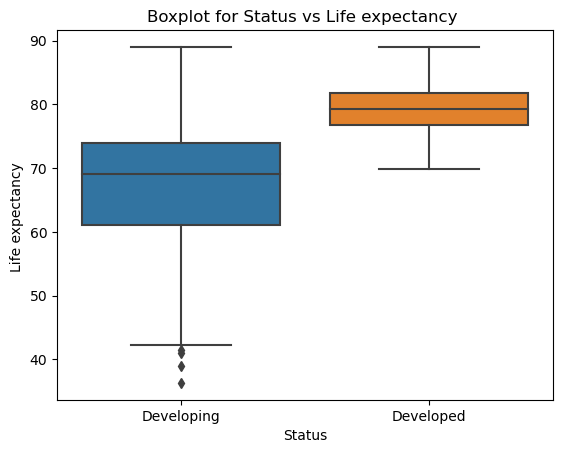

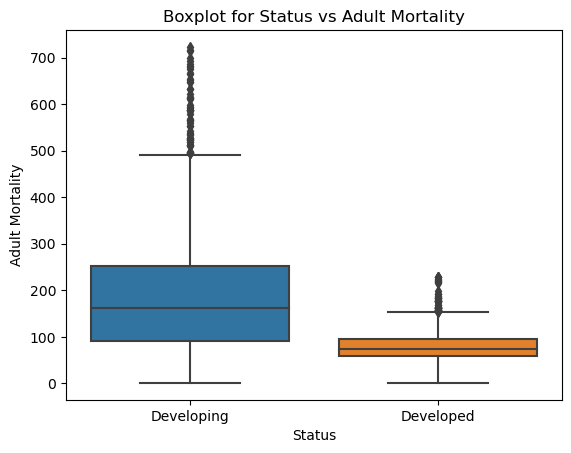

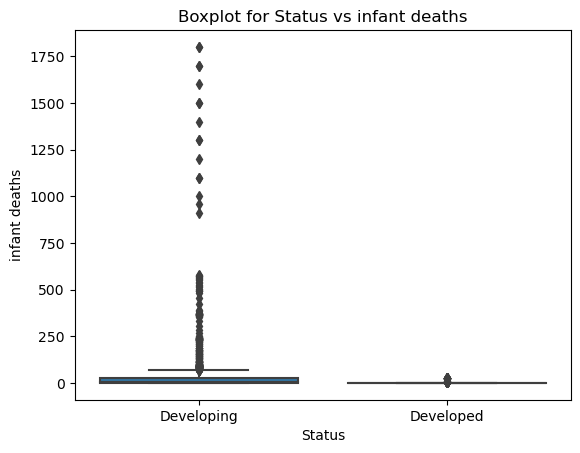

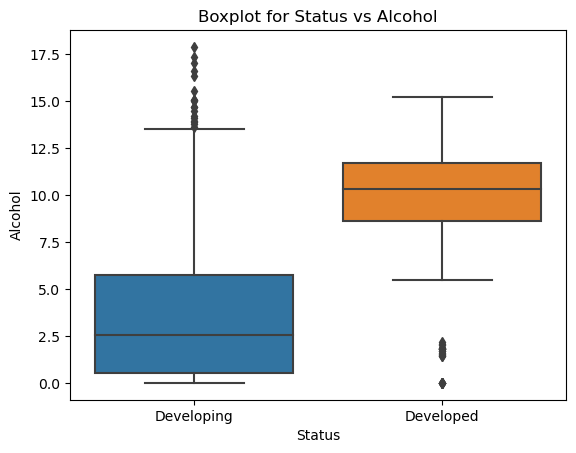

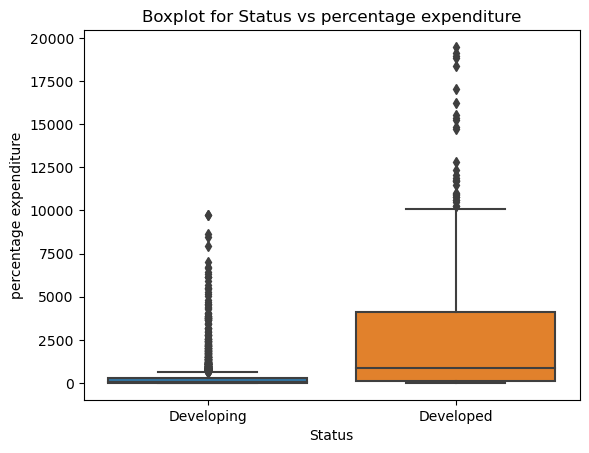

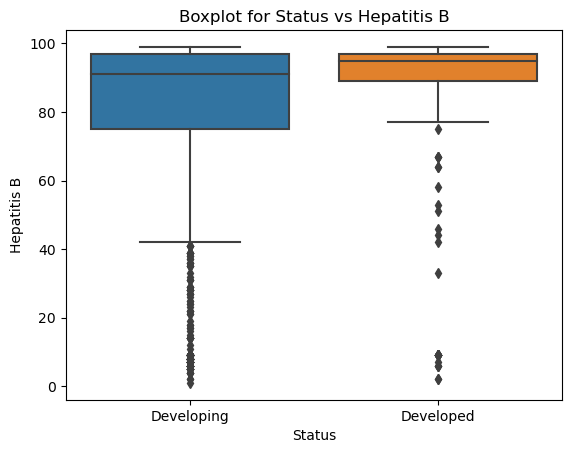

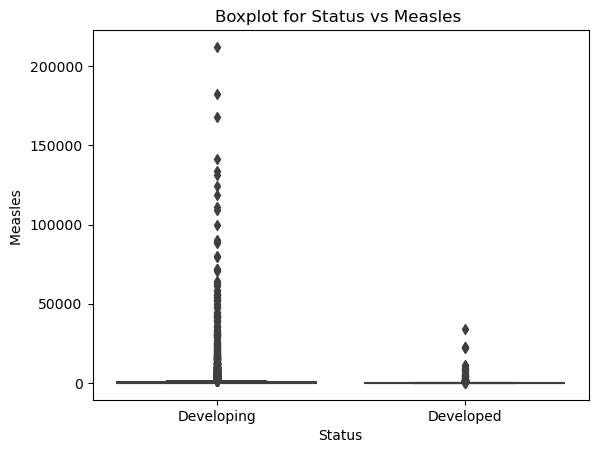

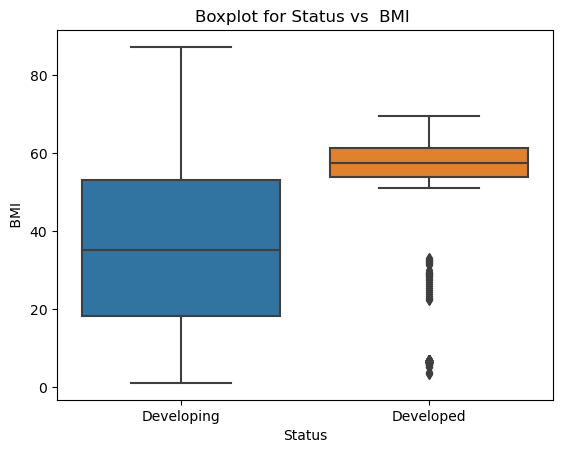

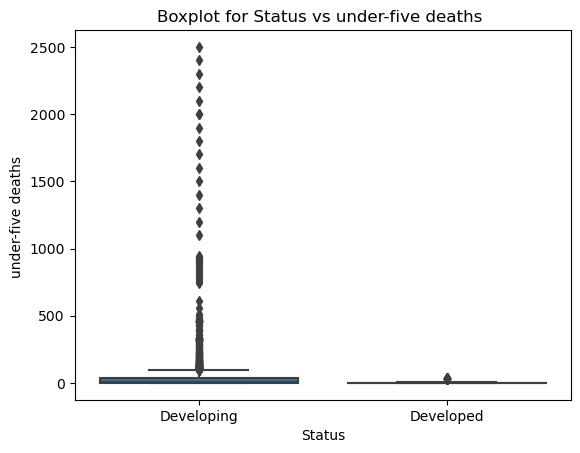

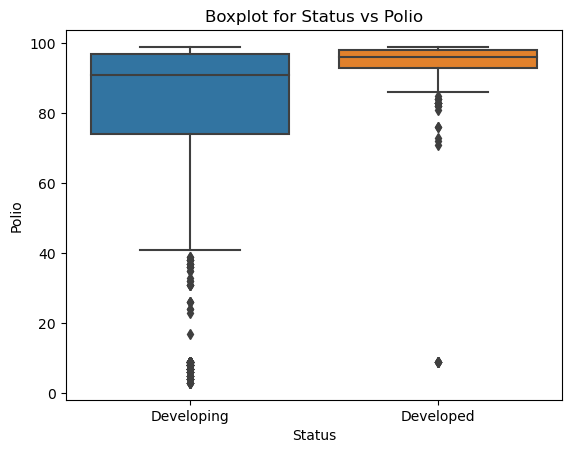

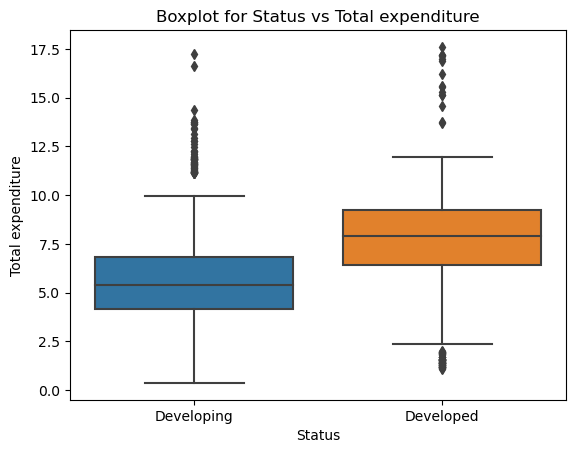

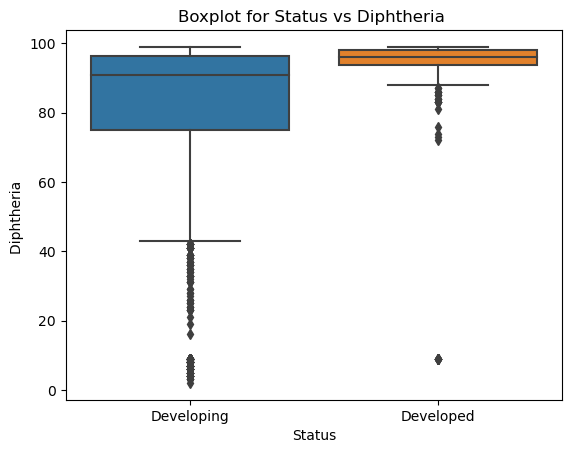

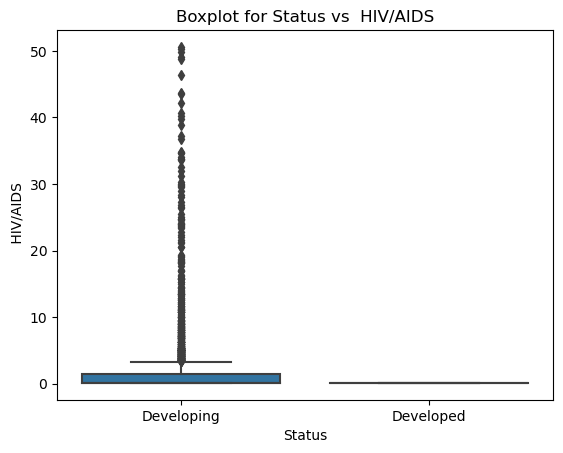

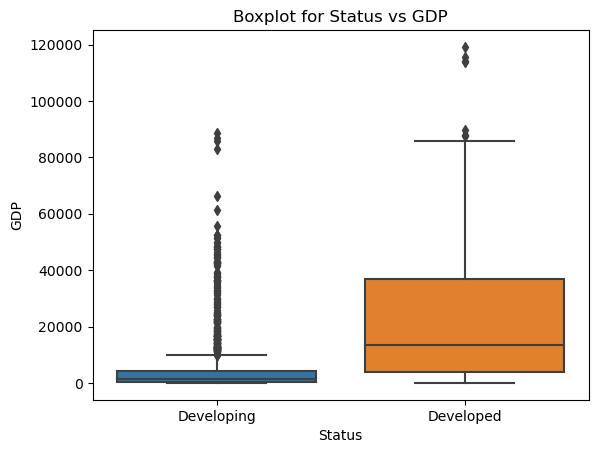

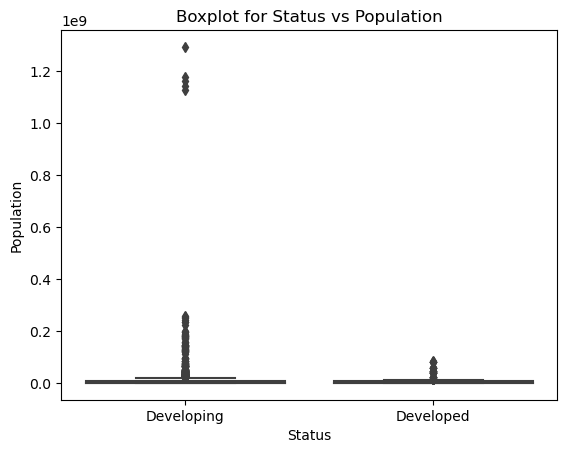

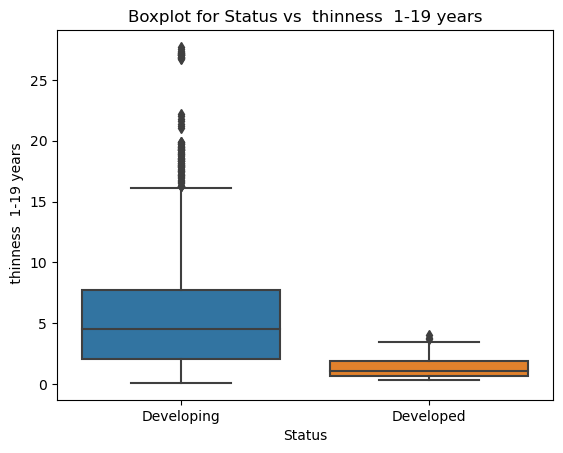

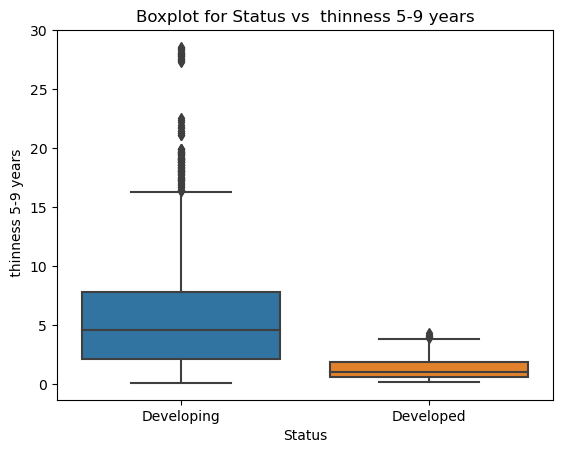

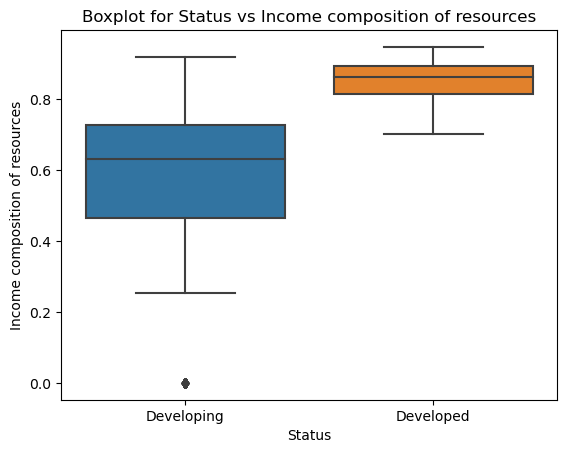

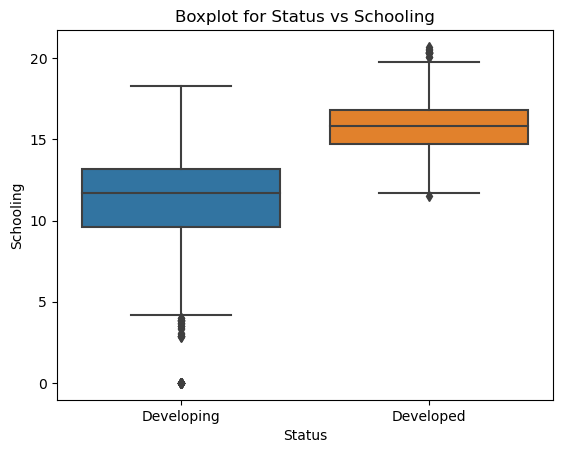

In [46]:
for i in con:
    sns.boxplot(data=df, x='Status', y=i)
    plt.title(f'Boxplot for Status vs {i}')
    plt.show()

### Categorical Vs Categorical - Crosstab

In [47]:
ctab = pd.crosstab(df['Status'], df['Country'])
ctab

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Status,,,,,,,,,,,,,,,,,,,,,
Developed,0,0,0,0,0,0,0,16,16,0,...,0,16,0,0,0,0,0,0,0,0
Developing,16,16,16,16,16,16,16,0,0,16,...,16,0,16,16,16,16,16,16,16,16


<Axes: xlabel='Country', ylabel='Status'>

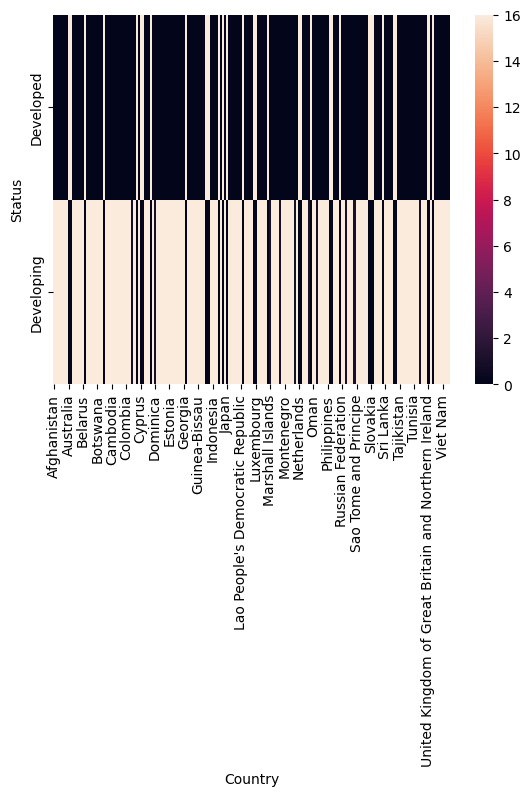

In [48]:
sns.heatmap(ctab)

### multivariate - Pairplot

In [51]:
con

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

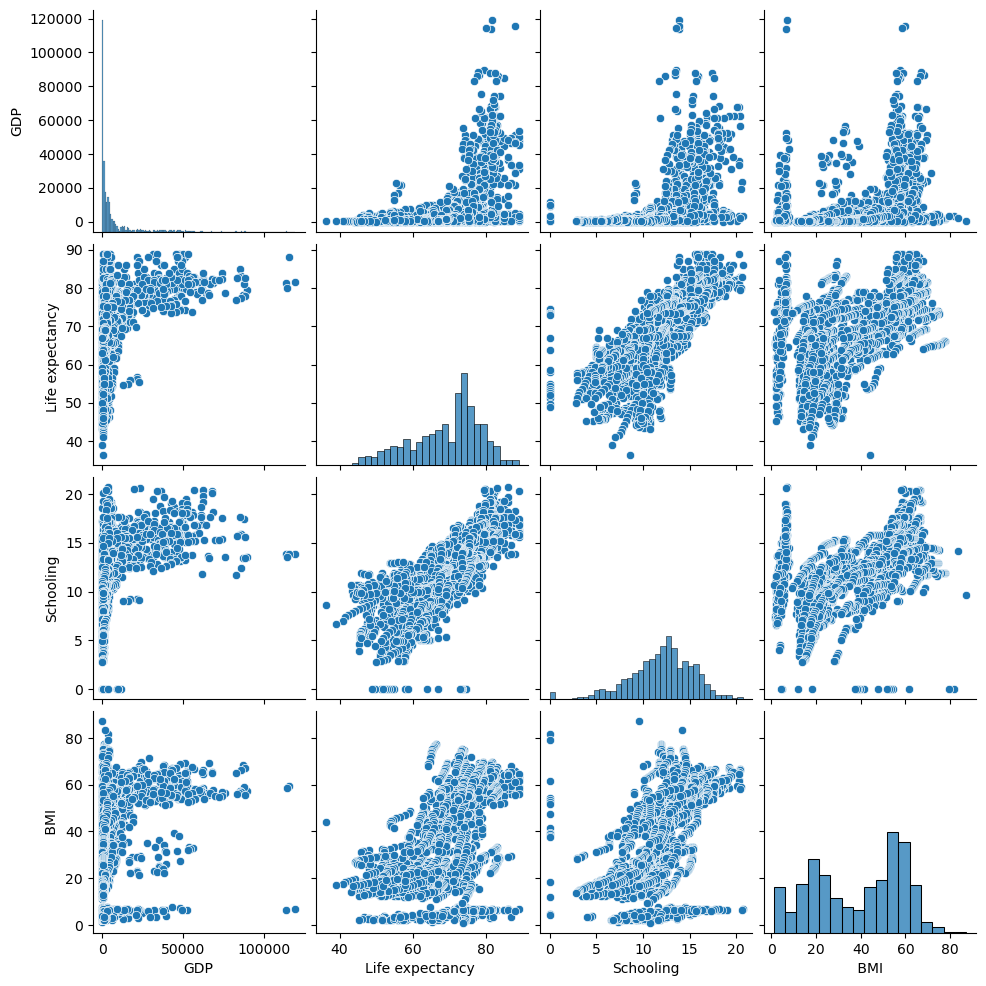

In [53]:
sns.pairplot(data=df[['GDP','Life expectancy ', 'Schooling', ' BMI ']])

In [54]:
B = df[['GDP','Life expectancy ', 'Schooling', ' BMI ', 'Status']]

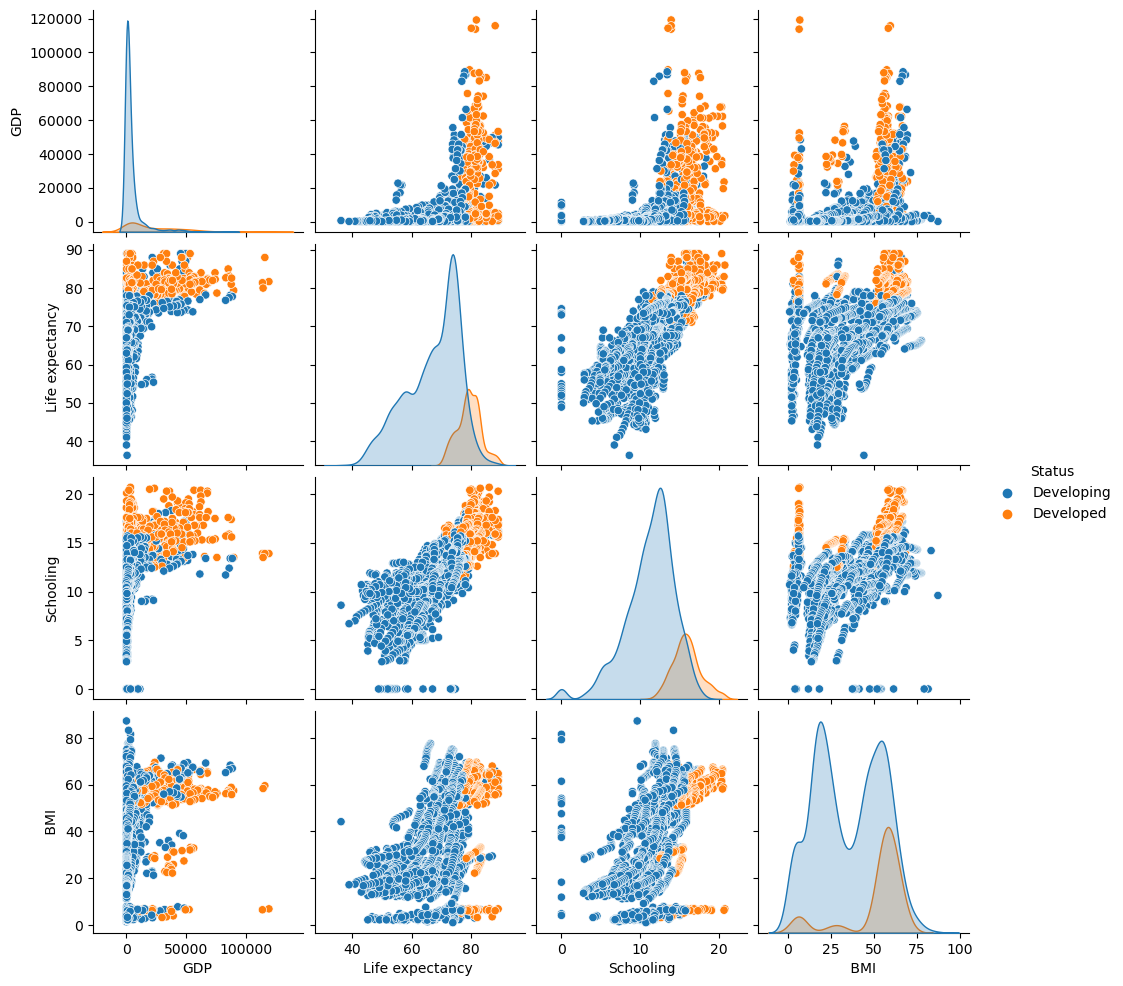

In [55]:
sns.pairplot(B, hue='Status')